From https://gitlab.com/dword4/nhlapi/tree/master

Import numpy, requests, and json modules

Introduction
--
In our ever changing and evolving field of technology one of the foremost topics is data analytics. The growth in the amount of digital data that is being collected across many different fields is massive and . That is, taking data in whatever raw form it exists and using technology to transform it into information that has value and context. In most cases data analysis is performed in order to provide class descriptions of data, highlight behaviors, trends, associations in the data or predictive information that prove useful or even vital to key decision-makers. 


In [ ]:
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

Get the rosters for the 2017-2018 season as a json object

In [ ]:
team_rosters_2017_2018 = requests.get('https://statsapi.web.nhl.com/api/v1/teams?expand=team.roster&season=20172018')

In [ ]:
team_rosters_2017_2018 = team_rosters_2017_2018.json()

Print out all the team names

In [ ]:
for i in range(0, len(team_rosters_2017_2018['teams'])):
    print(team_rosters_2017_2018['teams'][i]['name'])

Get every player from every team
Makes a players array holding [player_id, player_name, team]

In [ ]:
players_2017_2018 = []
for i in range(0, len(team_rosters_2017_2018['teams'])):
    #print(team_rosters_2017_2018['teams'][i]['name'])
    for j in range(0, len(team_rosters_2017_2018['teams'][i]['roster']['roster'])):
        #print(team_rosters_2017_2018['teams'][i]['roster']['roster'][j]['person'])
        player = [team_rosters_2017_2018['teams'][i]['roster']['roster'][j]['person']['id'], 
                  team_rosters_2017_2018['teams'][i]['roster']['roster'][j]['person']['fullName'],
                 team_rosters_2017_2018['teams'][i]['name']]
        if (team_rosters_2017_2018['teams'][i]['roster']['roster'][j]['position']['code'] != 'G'):
            players_2017_2018.append(player)
                                                                    
                                                                    

In [ ]:
for i in range(0, len(players_2017_2018)):
    print(players_2017_2018[i])

Get the stats for each player as an array of [timeOnIce, assists, goals, pim, shots, games, hits, powerPlayGoals, powerPlayPoints, powerPlayTimeOnIce, evenTimeOnIce, penaltyMinutes, faceOffPct, shotPct, gameWinningGoals, overTimeGoals, shortHandedGoals, shortHandedPoints, shortHandedTimeOnIce, blocked, plusMinus, points, shifts, timeOnIcePerGame, evenTimeOnIcePerGame, shortHandedTimeOnIcePerGame, powerPlayTimeOnIcePerGame]

In [ ]:
players_2017_2018_stats = []
for i in range(0, len(players_2017_2018)): 
    stats = requests.get('https://statsapi.web.nhl.com/api/v1/people/' 
                       + str(players_2017_2018[i][0]) 
                       + '/stats?stats=statsSingleSeason&season=20172018').json()
    stats = stats['stats'][0]['splits'][0]['stat']
    stats_array = []
    stats_array.append(stats['timeOnIce'])
    stats_array.append(stats['assists'])
    stats_array.append(stats['goals'])
    stats_array.append(stats['pim'])
    stats_array.append(stats['shots'])
    stats_array.append(stats['games'])
    stats_array.append(stats['hits'])
    stats_array.append(stats['powerPlayGoals'])
    stats_array.append(stats['powerPlayPoints'])
    stats_array.append(stats['powerPlayTimeOnIce'])
    stats_array.append(stats['evenTimeOnIce'])
    stats_array.append(stats['penaltyMinutes'])
    stats_array.append(stats['faceOffPct'])
    stats_array.append(stats['shotPct'])
    stats_array.append(stats['gameWinningGoals'])
    stats_array.append(stats['overTimeGoals'])
    stats_array.append(stats['shortHandedGoals'])
    stats_array.append(stats['shortHandedPoints'])
    stats_array.append(stats['shortHandedTimeOnIce'])
    stats_array.append(stats['blocked'])
    stats_array.append(stats['plusMinus'])
    stats_array.append(stats['points'])
    stats_array.append(stats['shifts'])
    stats_array.append(stats['timeOnIcePerGame'])
    stats_array.append(stats['evenTimeOnIcePerGame'])
    stats_array.append(stats['shortHandedTimeOnIcePerGame'])
    stats_array.append(stats['powerPlayTimeOnIcePerGame'])
    players_2017_2018_stats.append(stats_array)

print(len(players_2017_2018_stats))
print(len(players_2017_2018_stats[0]))
    

Append the stats for each player to their id, name, and team

In [ ]:
skaters_2017_2018 = []
for i in range(0, len(players_2017_2018)):
    skaters_2017_2018.append(players_2017_2018[i] + players_2017_2018_stats[i])


In [ ]:
print(skaters_2017_2018)

Save the skaters array as csv data for anaylsis 

In [ ]:
np.savetxt('data/skaters_2017_2018.csv', skaters_2017_2018, fmt='%s', delimiter=',')

In [ ]:
def get_csv(y1, y2):
    team_rosters = requests.get('https://statsapi.web.nhl.com/api/v1/teams?expand=team.roster&season=' + y1 + y2)
    #print('https://statsapi.web.nhl.com/api/v1/teams?expand=team.roster&season=' + y1 + y2)
    team_rosters = team_rosters.json()
    players= []
    for i in range(0, len(team_rosters['teams'])):
        #print(team_rosters_2017_2018['teams'][i]['name'])
        for j in range(0, len(team_rosters['teams'][i]['roster']['roster'])):
            #print(team_rosters_2017_2018['teams'][i]['roster']['roster'][j]['person'])
            player = [team_rosters['teams'][i]['roster']['roster'][j]['person']['id'], 
                      team_rosters['teams'][i]['roster']['roster'][j]['person']['fullName'],
                     team_rosters['teams'][i]['name']]
            if (team_rosters['teams'][i]['roster']['roster'][j]['position']['code'] != 'G'):
                players.append(player)
    players_stats = []
    labels = requests.get('https://statsapi.web.nhl.com/api/v1/people/' 
                           + str(players[i][0]) 
                           + '/stats?stats=statsSingleSeason&season=' + y1 + y2).json()
    labels = labels['stats'][0]['splits'][0]['stat']
    header = ['id', 'fullName', 'teamName']
    for label in labels:
        header.append(label)
    #print(labels)
    #print(header)
    for i in range(0, len(players)): 
        #print(str(players[i][0]))
        stats = requests.get('https://statsapi.web.nhl.com/api/v1/people/' 
                           + str(players[i][0]) 
                           + '/stats?stats=statsSingleSeason&season=' + y1 + y2).json()
        if(stats['stats'][0]['splits'] == []):
            players_stats.append([0] * len(labels))
            continue
        stats = stats['stats'][0]['splits'][0]['stat']
        
        stats_array = []
        for label in labels:
            if label in stats:
                stats_array.append(stats[label])
            else:
                stats_array.append(0)
        players_stats.append(stats_array)
        
    skaters = []
    skaters.append(header)
    for i in range(0, len(players)):
        skaters.append(players[i] + players_stats[i])
    return skaters

In [ ]:
skaters = get_csv('2016', '2017')
np.savetxt('data/skaters_2016_2017.csv', skaters, fmt='%s', delimiter=',')

In [ ]:
skaters = get_csv('2015', '2016')
np.savetxt('data/skaters_2015_2016.csv', skaters, fmt='%s', delimiter=',')

In [ ]:
skaters = get_csv('2014', '2015')
np.savetxt('data/skaters_2014_2015.csv', skaters, fmt='%s', delimiter=',')

In [ ]:
skaters = get_csv('1970', '1971')
np.savetxt('data/skaters_1970_1971.csv', skaters, fmt='%s', delimiter=',')

In [ ]:
stats = requests.get('https://statsapi.web.nhl.com/api/v1/people/' 
                       + str(8445135) 
                       + '/stats?stats=statsSingleSeason&season=19171918').json()

In [ ]:
stats

In [ ]:
stats = stats = stats['stats'][0]['splits'][0]['stat']

In [ ]:
player_stats = []
for x in stats:
    player_stats.append(x)

In [ ]:
player_stats

In [ ]:
def get_data(start, end):
    for i in range(start, end):
        if(i == 2004):
            continue
        print("Getting data for " + str(i) + "-" + str(i+1) + " season.")
        skaters = get_csv(str(i), str(i+1))
        np.savetxt('data/skaters_' + str(i) + '_' + str(i+1) + '.csv', skaters, fmt='%s', delimiter=',')

In [ ]:
get_data(2005,2018)

Get Team data

In [ ]:
teams = requests.get('https://statsapi.web.nhl.com/api/v1/teams?season=20172018')
teams = teams.json()

In [ ]:
team_id_name = []
for i in range(0, len(teams['teams'])):
    team_arr = [teams['teams'][i]['id'], teams['teams'][i]['name']]
    team_id_name.append(team_arr)
#print(team_id_name)

labels = requests.get('https://statsapi.web.nhl.com/api/v1/teams/' 
                           + str(team_id_name[0][0])
                           + '/stats?stats=statsSingleSeason&season=19901991').json()
labels = labels['stats'][0]['splits'][0]['stat']
header = ['id', 'teamName']
for label in labels:
    header.append(label)
#print(header)
header.append('PDO')

team_stats = []
for i in range(0, len(team_id_name)):
    stats = requests.get('https://statsapi.web.nhl.com/api/v1/teams/' 
                         + str(team_id_name[i][0]) 
                         + '/stats?stats=statsSingleSeason&season=19901991').json()
    if(stats['stats'][0]['splits'] == []):
        team_stats.append([0] * len(labels))
        continue
    stats = stats['stats'][0]['splits'][0]['stat']
    PDO = stats['shootingPctg'] + stats['savePctg']
    stats_array = []
    for label in labels:
        if label in stats:
            stats_array.append(stats[label])
        elif label == 'PDO':
            stats_array.append(PDO)
        else:
            stats_array.append(0)
    team_stats.append(stats_array)

    
teams_stats_final = []
teams_stats_final.append(header)
for i in range(0, len(team_id_name)):
    teams_stats_final.append(team_id_name[i] + team_stats[i])    

np.savetxt('team_data/teams_19901991.csv', teams_stats_final, fmt='%s', delimiter=',')

In [ ]:
def get_csv_team(y1, y2):
    teams = requests.get('https://statsapi.web.nhl.com/api/v1/teams?season=' + str(y1) + str(y2))
    teams = teams.json()
    team_id_name = []
    for i in range(0, len(teams['teams'])):
        team_arr = [teams['teams'][i]['id'], teams['teams'][i]['name']]
        team_id_name.append(team_arr)

    labels = requests.get('https://statsapi.web.nhl.com/api/v1/teams/' 
                           + str(team_id_name[0][0])
                           + '/stats?stats=statsSingleSeason&season=' + str(y1) + str(y2)).json()
    labels = labels['stats'][0]['splits'][0]['stat']
    header = ['id', 'teamName']
    for label in labels:
        header.append(label)

    team_stats = []
    for i in range(0, len(team_id_name)):
        stats = requests.get('https://statsapi.web.nhl.com/api/v1/teams/' 
                             + str(team_id_name[i][0]) 
                             + '/stats?stats=statsSingleSeason&season=' + str(y1) + str(y2)).json()
        if(stats['stats'][0]['splits'] == []):
            team_stats.append([0] * len(labels))
            continue
        stats = stats['stats'][0]['splits'][0]['stat']
        stats_array = []
        for label in labels:
            if label in stats:
                stats_array.append(stats[label])
            else:
                stats_array.append(0)
        team_stats.append(stats_array)

    
    teams_stats_final = []
    teams_stats_final.append(header)
    for i in range(0, len(team_id_name)):
        teams_stats_final.append(team_id_name[i] + team_stats[i]) 
    return teams_stats_final

In [ ]:
def get_team_data(start, end):
    for i in range(start, end):
        if(i == 2004):
            continue
        print("Getting data for " + str(i) + "-" + str(i+1) + " season.")
        data = get_csv_team(str(i), str(i+1))
        np.savetxt('team_data/teams_' + str(i) + '_' + str(i+1) + '.csv', data, fmt='%s', delimiter=',')

In [ ]:
games = requests.get('https://statsapi.web.nhl.com/api/v1/schedule?startDate=2017-10-04&endDate=2018-06-07')

In [ ]:
games = games.json()

In [ ]:
team_data_list = []
for i in range(2000,2017):
    if(i == 2004):
        continue
    print("getting " + str(i))
    team_data_list.append(get_csv_team(i, i+1))

In [ ]:
def get_team_stats(id, team_data):
    for i in range(0, len(team_data)):
        if team_data[i][0] == id:
            return i

In [ ]:
team_data_list[0]

In [ ]:
def get_csv_game(y1, y2):
    team_data = get_csv_team(y1, y2)
    header = team_data[0][3:]
    header = header *2
    # print(header)
    games_data = [['winner', 'awayID', 'homeID'] + header]
    games = requests.get('https://statsapi.web.nhl.com/api/v1/schedule?startDate=' 
                         + str(y1) + '-10-01&endDate=' + str(y2) + '-06-30')
    games = games.json()
    for date in games['dates']:
        for game in date['games']:
            away_ID = game['teams']['away']['team']['id']
            home_ID = game['teams']['home']['team']['id']
            if away_ID > 80 or home_ID > 80:
                continue
            
            away_score = game['teams']['away']['score']
            home_score = game['teams']['home']['score']
            winner = 0
            away_stats = team_data[get_team_stats(away_ID, team_data)][3:]
            home_stats = team_data[get_team_stats(home_ID, team_data)][3:]
            if home_score > away_score:
                winner = 1
            games_data.append([winner,
                          away_ID, 
                          home_ID] +
                          away_stats +
                          home_stats)
    return games_data

In [ ]:
def get_csv_current_game(date1, date2, y1, y2):
    team_data = get_csv_team(y1, y2)
    header = team_data[0][3:]
    header = header *2
    # print(header)
    games_data = [['winner', 'awayID', 'homeID'] + header]
    games = requests.get('https://statsapi.web.nhl.com/api/v1/schedule?startDate=' 
                         +date1 + '&endDate=' + date2)
    games = games.json()
    for date in games['dates']:
        for game in date['games']:
            away_ID = game['teams']['away']['team']['id']
            home_ID = game['teams']['home']['team']['id']
            if away_ID > 80 or home_ID > 80:
                continue
            
            away_score = game['teams']['away']['score']
            home_score = game['teams']['home']['score']
            winner = 0
            away_stats = team_data[get_team_stats(away_ID, team_data)][3:]
            home_stats = team_data[get_team_stats(home_ID, team_data)][3:]
            if home_score > away_score:
                winner = 1
            games_data.append([winner,
                          away_ID, 
                          home_ID] +
                          away_stats +
                          home_stats)
    return games_data

In [ ]:
g_data = get_csv_game(2017, 2018)

In [ ]:
def get_game_data(start, end):
    for i in range(start, end):
        if(i == 2004):
            continue
        print("Getting data for " + str(i) + "-" + str(i+1) + " season.")
        data = get_csv_game(i, i+1)
        np.savetxt('game_data/game_data_' + str(i) + '_' + str(i+1) + '.csv', data, fmt='%s', delimiter=',')

In [ ]:
get_game_data(2017,2018)

In [ ]:
current_data = get_csv_current_game('2018-11-19', '2018-11-19', 2018,2019)
np.savetxt('current_data_2018_2019.csv', current_data, fmt='%s', delimiter=',')

In [ ]:
data_2000_2001 = pd.read_csv('game_data/game_data_2000_2001.csv', header=0)
data_2000_2001.head()

Starting anaylsis
--

In [2]:
data_2001_2002 = pd.read_csv('game_data/game_data_2001_2002.csv', header=0)
data_2002_2003 = pd.read_csv('game_data/game_data_2002_2003.csv', header=0)
data_2003_2004 = pd.read_csv('game_data/game_data_2003_2004.csv', header=0)
# data_2004_2005 = pd.read_csv('game_data/game_data_2004_2005.csv', header=0)
data_2005_2006 = pd.read_csv('game_data/game_data_2005_2006.csv', header=0)
data_2006_2007 = pd.read_csv('game_data/game_data_2006_2007.csv', header=0)
data_2007_2008 = pd.read_csv('game_data/game_data_2007_2008.csv', header=0)
data_2008_2009 = pd.read_csv('game_data/game_data_2008_2009.csv', header=0)
data_2009_2010 = pd.read_csv('game_data/game_data_2009_2010.csv', header=0)
data_2010_2011 = pd.read_csv('game_data/game_data_2010_2011.csv', header=0)
data_2011_2012 = pd.read_csv('game_data/game_data_2011_2012.csv', header=0)
data_2012_2013 = pd.read_csv('game_data/game_data_2012_2013.csv', header=0)
data_2013_2014 = pd.read_csv('game_data/game_data_2013_2014.csv', header=0)
data_2014_2015 = pd.read_csv('game_data/game_data_2014_2015.csv', header=0)
data_2015_2016 = pd.read_csv('game_data/game_data_2015_2016.csv', header=0)
data_2016_2017 = pd.read_csv('game_data/game_data_2016_2017.csv', header=0)
data_2017_2018 = pd.read_csv('game_data/game_data_2017_2018.csv', header=0)

frames = [data_2001_2002, data_2002_2003, data_2003_2004, data_2005_2006, data_2006_2007, data_2007_2008,
        data_2008_2009, data_2009_2010, data_2010_2011, data_2011_2012, data_2012_2013, data_2013_2014,
        data_2014_2015, data_2015_2016, data_2016_2017, data_2017_2018]
data = pd.concat(frames)

In [3]:
data.head()

,winner,awayID,homeID,wins,losses,ot,pts,ptPctg,goalsPerGame,goalsAgainstPerGame,...,winLeadFirstPer.1,winLeadSecondPer.1,winOutshootOpp.1,winOutshotByOpp.1,faceOffsTaken.1,faceOffsWon.1,faceOffsLost.1,faceOffWinPercentage.1,shootingPctg.1,savePctg.1
0,0,9,10,39,27,7,94,57.3,2.963,2.537,...,0.727,0.846,0.544,0.478,5281.0,2736.0,2545.0,51.8,10.6,0.899
1,0,21,5,45,28,1,99,60.4,2.585,2.061,...,0.579,0.800,0.364,0.289,5484.0,2583.0,2901.0,47.1,8.9,0.896
2,1,22,20,38,28,4,92,56.1,2.500,2.220,...,0.667,0.778,0.314,0.429,5487.0,2883.0,2604.0,52.5,9.1,0.902
3,0,11,7,19,47,5,54,32.9,2.280,3.512,...,0.657,0.829,0.372,0.500,5468.0,2591.0,2877.0,47.4,9.3,0.906
4,0,8,9,36,31,3,87,53.0,2.524,2.549,...,0.815,0.909,0.444,0.500,5342.0,2677.0,2665.0,50.1,9.8,0.902


In [ ]:
data_regression = pd.read_csv('game_data/game_data_2017_2018.csv', header=0)
data_regression.head()

In [4]:
def prepare(data):
    X = data.iloc[:,3:].values

    # we normalize X
    maxX = np.max(X, axis=0)
    minX = np.min(X, axis=0)
    X = (X-minX)/(maxX-minX)

    # we insert an all-ones column at index 0
    X = np.insert(X, 0, 1, axis=1)
    
    # get the first column of the data
    y = data.iloc[:,0:1].values
    
    # we normalize y
#     maxy = np.max(y, axis=0)
#     miny = np.min(y, axis=0)
#     y = (y-miny)/(maxy-miny)

    where_are_zeros = (y==0)
    y[where_are_zeros] = -1
    return X,y

In [5]:
X,y = prepare(data)

print(X)
print(y)

[[ 1.          0.55813953  0.40816327 ...,  0.62295082  0.68518519
   0.30612245]
 [ 1.          0.69767442  0.42857143 ...,  0.23770492  0.37037037
   0.24489796]
 [ 1.          0.53488372  0.42857143 ...,  0.68032787  0.40740741
   0.36734694]
 ..., 
 [ 1.          0.8372093   0.34693878 ...,  0.50819672  0.72222222
   0.51020408]
 [ 1.          0.8372093   0.34693878 ...,  0.50819672  0.72222222
   0.51020408]
 [ 1.          0.79069767  0.3877551  ...,  0.3852459   0.57407407
   0.55102041]]
[[-1]
 [-1]
 [ 1]
 ..., 
 [ 1]
 [ 1]
 [-1]]


In [6]:
#TODO
def error(x,y,w):
    return np.log(1+np.exp(-y*x@w.T))

#TODO
def error_mean(X,y,w):
    return sum(error(X,y,w))/len(y)

In [7]:
#TODO
def grad(x,y,w):
    return (y*x)/(1+np.exp(y*x@w.T))

#TODO
def grad_mean(X,y,w):
    return -1/len(y)*sum(grad(X,y,w))

In [8]:
def fit(X,y,kappa,iter):
    w = np.zeros((1,X.shape[1]))
    E = []

    #TODO
    for i in range(0,iter):
        E.append(error_mean(X,y,w))
        w = w - kappa*grad_mean(X,y,w)
    return w,E

[[ 0.00756769 -0.20372103  0.17067509  0.16698786 -0.20428344 -0.20675195
  -0.10754157  0.17942154 -0.18582368 -0.03900726 -0.04142724  0.06202568
  -0.01482159 -0.10584238 -0.05887088  0.13080417 -0.1221099  -0.15178044
  -0.08477791 -0.06335385 -0.12057831 -0.20667048 -0.05735739 -0.0571418
  -0.03551812 -0.03223796 -0.08893491 -0.11542794  0.2235234  -0.14758855
  -0.00711544  0.18169871  0.21254493  0.13715869 -0.11158287  0.16051944
   0.11120909  0.06451087 -0.04143877 -0.00216322  0.05350251  0.09031767
  -0.06520468  0.19796831  0.16786609  0.15190549  0.1438965   0.21351079
   0.18715658 -0.06706193 -0.04066064 -0.06942207  0.04783961  0.10887929
   0.09054027]]


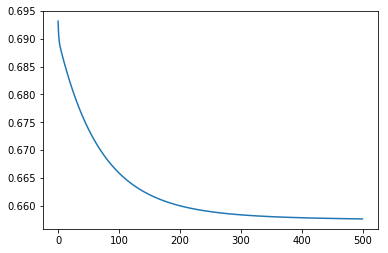

In [12]:
w,E = fit(X,y,0.1,500)
print(w)
plt.plot(E)
plt.show()

In [18]:
def predict(w, X):
    pred = 1/(1+np.exp(X@-w.T))
    for n in range(0, len(pred)):
        if(pred[n] < 0.5):
            pred[n] = -1
        else:
            pred[n] = 1
    return pred
#TODO
def accuracy(y,y_pred):
    acc = 0
    for n in range(0,len(y)):
        if(y[n] + y_pred[n] == 0):
            acc = acc +1
    return 1-((acc)/len(y))

y_pred = predict(w,X)
#print(y_pred)
print( accuracy(y,y_pred) )

0.6042419860207279


In [19]:
def split_train_test(X,y,pct=80):
    n = X.shape[0]
    s = round(n * pct / 100)
    
    indices = np.random.permutation(n)
    train_idx, test_idx = indices[:s], indices[s:]
    
    X_train, X_test = X[train_idx,:], X[test_idx,:]
    y_train, y_test = y[train_idx,:], y[test_idx,:]
    
    return X_train, y_train, X_test, y_test

[[ 0.00686202 -0.17897432  0.14371358  0.11582757 -0.17629744 -0.17577141
  -0.10107228  0.14415543 -0.16341931 -0.04026136 -0.04249619  0.04764998
  -0.01527004 -0.0812783  -0.05399201  0.1033532  -0.10949246 -0.13080632
  -0.07791402 -0.06424901 -0.11059052 -0.17389467 -0.04553688 -0.04619334
  -0.02721618 -0.02771121 -0.08433495 -0.09486541  0.20292481 -0.14497259
  -0.01157084  0.17105807  0.19954546  0.12639986 -0.11772178  0.15577259
   0.11019921  0.06263944 -0.04365177 -0.00338092  0.05876727  0.07695653
  -0.06555427  0.17364664  0.15064217  0.1291371   0.1243158   0.18613785
   0.1839093  -0.05411968 -0.02703598 -0.06206082  0.05486879  0.10408535
   0.09816589]]


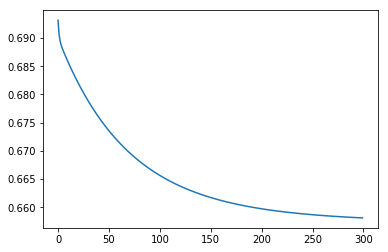

0.6035189202217401


In [20]:
X_train, y_train, X_test, y_test = split_train_test(X,y,pct=80)
w,E = fit(X_train,y_train,0.1,300)
print(w)
plt.plot(E)
plt.show()
y_pred = predict(w,X_test)
print( accuracy(y_test,y_pred) )

Logistic regression binary classifier in Tensorflow
--

In [ ]:
import tensorflow as tf

In [ ]:
def accuracy(A, Y):
    P = A<.5      #prediction
    num_agreements = np.sum(P==Y)
    return num_agreements / Y.shape[0]

In [ ]:
X,Y,X_test,Y_test = split_train_test(X,y,pct=80)


In [ ]:
# We will reshape the Y arrays so that they are not rank 1 arrays but rank 2 arrays. 
# They should be rank 2 arrays.

Y = Y.reshape((Y.shape[0],1))
Y_test = Y_test.reshape((Y_test.shape[0],1))

print("Train dataset shape", X.shape, Y.shape)
print("Test dataset shape", X_test.shape, Y_test.shape)

print("Y =", Y)

m   = X.shape[0] 
n_x = X.shape[1]

In [ ]:
# Input data.
# Load the training and test data into constants
tf_X = tf.constant(X.astype(np.float32))
tf_Y = tf.constant(Y.astype(np.float32))
tf_X_test = tf.constant(X_test.astype(np.float32))
tf_Y_test = tf.constant(Y_test.astype(np.float32))

# Variables.
# These are the parameters that we are going to be training.
tf_w = tf.Variable(tf.zeros((n_x, 1)))
tf_b = tf.Variable(tf.zeros((1,1)))

# Training computation.
# We multiply the inputs with the weight matrix, and add biases. We compute
# the sigmoid and cross-entropy (it's one operation in TensorFlow, because
# it's very common, and it can be optimized). We take the average of this
# cross-entropy across all training examples: that's our cost.
tf_Z = tf.matmul(tf_X, tf_w) + tf_b
tf_J = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits(labels=tf_Y, logits=tf_Z) )

# Optimizer.
# We are going to find the minimum of this loss using gradient descent.
# We pass alpha=0.1 as input parameter.
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(tf_J)

# Predictions for the train and test data.
# These are not part of training, but merely here so that we can report
# accuracy figures as we train.
tf_A = tf.nn.sigmoid(tf_Z)
tf_A_test = tf.nn.sigmoid(tf.matmul(tf_X_test, tf_w) + tf_b)

In [ ]:
session = tf.InteractiveSession()

# This is a one-time operation which ensures the parameters get initialized as
# we described in the graph: random weights for the matrix, zeros for the biases. 
tf.global_variables_initializer().run()
print("Initialized")

for iter in range(1000):
    # Run the computations. We tell .run() that we want to run the optimizer,
    # and get the cost value and the training predictions returned as numpy arrays.
    _, J, A = session.run([optimizer, tf_J, tf_A])
    
    print(iter, J)

In [ ]:
# Calling .eval() is basically like calling run(), but
# just to get that one numpy array. 
# Note that it recomputes all its computation graph dependencies.
A = tf_A.eval()
A_test = tf_A_test.eval()

print("Accuracy on the train set is ", accuracy(A,Y))
print("Accuracy on the test set is ", accuracy(A_test,Y_test))

Stochastic Gradient Descent
--

In [ ]:
# Input data.
# Let's use placeholders for the training data. 
# This is so that we can suply batches of tranining examples each iteration.
tf_X = tf.placeholder(tf.float32)
tf_Y = tf.placeholder(tf.float32)

tf_X_test = tf.constant(X_test.astype(np.float32))
tf_Y_test = tf.constant(Y_test.astype(np.float32))

# Variables.
# These are the parameters that we are going to be training.
tf_w = tf.Variable( tf.zeros((n_x, 1)) )
tf_b = tf.Variable(tf.zeros((1,1)))

# Training computation.
# We multiply the inputs with the weight matrix, and add biases. We compute
# the sigmoid and cross-entropy (it's one operation in TensorFlow, because
# it's very common, and it can be optimized). We take the average of this
# cross-entropy across all training examples: that's our cost.
tf_Z = tf.matmul(tf_X, tf_w) + tf_b
tf_J = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits(labels=tf_Y, logits=tf_Z) )

# Optimizer.
# We are going to find the minimum of this loss using gradient descent.
# We pass alpha=0.1 as input parameter.
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(tf_J)

# Predictions for the train and test data.
# These are not part of training, but merely here so that we can report
# accuracy figures as we train.
tf_A = tf.nn.sigmoid(tf_Z)
tf_A_test = tf.nn.sigmoid(tf.matmul(tf_X_test, tf_w) + tf_b)

In [ ]:
num_steps = 10001
batch_size = 100

tf.global_variables_initializer().run()
print("Initialized")

for step in range(num_steps):
    # Pick an offset within the training data.
    offset = (step * batch_size) % (X.shape[0] - batch_size)
    
    # Generate a minibatch.
    X_batch = X[offset:(offset + batch_size), :]
    Y_batch = Y[offset:(offset + batch_size), :]
    
    _, J, A = session.run([optimizer, tf_J, tf_A], feed_dict={tf_X : X_batch, tf_Y : Y_batch})
    
    if (step % 500 == 0):
        print("Minibatch loss at step ", (step, J))
        print("Minibatch accuracy: ", accuracy(A, Y_batch))
        A_test = tf_A_test.eval()
        print("Test accuracy: ", accuracy(A_test,Y_test))

Neural network in TensorFlow
--

In [ ]:
# Input data.

num_hidden_nodes = 15

C = 1

# Load the training and test data into constants
tf_X = tf.constant(X.astype(np.float32))
tf_Y = tf.constant(Y.astype(np.float32))
tf_X_test = tf.constant(X_test.astype(np.float32))
tf_Y_test = tf.constant(Y_test.astype(np.float32))

# Variables.
# These are the parameters that we are going to be training.
tf_w1 = tf.Variable(tf.truncated_normal((n_x, num_hidden_nodes)))
tf_b1 = tf.Variable(tf.zeros((1, num_hidden_nodes)))
tf_w2 = tf.Variable(tf.truncated_normal([num_hidden_nodes, C]))
tf_b2 = tf.Variable(tf.zeros((1, C)))



tf_Z1 = tf.matmul(tf_X, tf_w1) + tf_b1
tf_A1 = tf.nn.relu(tf_Z1)    #tf.nn.relu(tf_Z1)
tf_Z2 = tf.matmul(tf_A1, tf_w2) + tf_b2
tf_A2 = tf.nn.relu(tf_Z2)

# Training computation.
# We multiply the inputs with the weight matrix, and add biases. We compute
# the sigmoid and cross-entropy (it's one operation in TensorFlow, because
# it's very common, and it can be optimized). We take the average of this
# cross-entropy across all training examples: that's our cost.
tf_J = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits(labels=tf_Y, logits=tf_Z2) )

# Optimizer.
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(tf_J)

# Predictions for the test data.
tf_Z1_test = tf.matmul(tf_X_test, tf_w1) + tf_b1
tf_A1_test = tf.nn.relu(tf_Z1_test)
tf_Z2_test = tf.matmul(tf_A1_test, tf_w2) + tf_b2
tf_A2_test = tf.nn.relu(tf_Z2_test)

In [ ]:
session = tf.InteractiveSession()

# This is a one-time operation which ensures the parameters get initialized as
# we described in the graph: random weights for the matrix, zeros for the biases. 
tf.global_variables_initializer().run()
print("Initialized")


# Replace None with your code.

for iter in range(100):
    # Run the computations. We tell .run() that we want to run the optimizer,
    # and get the cost value and the training predictions returned as numpy arrays.
    # Print out the iteration number and cost every 50 iterations.
    _, J, A = session.run([optimizer, tf_J, tf_A2])
    
    if iter%50 ==0:
        print(iter, J)

In [ ]:
# Print out the accuracy for the training set and test set.
A = tf_A2.eval()
A_test = tf_A2_test.eval()

print("Accuracy on the train set is ", accuracy(A,Y))
print("Accuracy on the test set is ", accuracy(A_test,Y_test))
# Put your code here.

# Call .eval() on tf_A2 and tf_A2_test.

Now try with more layers and more hidden nodes
--

In [ ]:
# Input data.

num_hidden_nodes = 100

C = 1

# Load the training and test data into constants
tf_X = tf.constant(X.astype(np.float32))
tf_Y = tf.constant(Y.astype(np.float32))
tf_X_test = tf.constant(X_test.astype(np.float32))
tf_Y_test = tf.constant(Y_test.astype(np.float32))

# Variables.
# These are the parameters that we are going to be training.
tf_w1 = tf.Variable(tf.truncated_normal((n_x, num_hidden_nodes)))
tf_b1 = tf.Variable(tf.zeros((1, num_hidden_nodes)))
tf_w2 = tf.Variable(tf.truncated_normal([num_hidden_nodes, num_hidden_nodes]))
tf_b2 = tf.Variable(tf.zeros((1, C)))
tf_w3 = tf.Variable(tf.truncated_normal([num_hidden_nodes, C]))
tf_b3 = tf.Variable(tf.zeros((1, C)))



tf_Z1 = tf.matmul(tf_X, tf_w1) + tf_b1
tf_A1 = tf.nn.relu(tf_Z1)    #tf.nn.relu(tf_Z1)
tf_Z2 = tf.matmul(tf_A1, tf_w2) + tf_b2
tf_A2 = tf.nn.relu(tf_Z2)
tf_Z3 = tf.matmul(tf_A2, tf_w3) + tf_b3
tf_A3 = tf.nn.relu(tf_Z3)

# Training computation.
# We multiply the inputs with the weight matrix, and add biases. We compute
# the sigmoid and cross-entropy (it's one operation in TensorFlow, because
# it's very common, and it can be optimized). We take the average of this
# cross-entropy across all training examples: that's our cost.
tf_J = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits(labels=tf_Y, logits=tf_Z3) )

# Optimizer.
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(tf_J)

# Predictions for the test data.
tf_Z1_test = tf.matmul(tf_X_test, tf_w1) + tf_b1
tf_A1_test = tf.nn.relu(tf_Z1_test)
tf_Z2_test = tf.matmul(tf_A1_test, tf_w2) + tf_b2
tf_A2_test = tf.nn.relu(tf_Z2_test)
tf_Z3_test = tf.matmul(tf_A2_test, tf_w3) + tf_b3
tf_A3_test = tf.nn.relu(tf_Z3_test)

In [ ]:
session = tf.InteractiveSession()

# This is a one-time operation which ensures the parameters get initialized as
# we described in the graph: random weights for the matrix, zeros for the biases. 
tf.global_variables_initializer().run()
print("Initialized")


# Replace None with your code.

for iter in range(500):
    # Run the computations. We tell .run() that we want to run the optimizer,
    # and get the cost value and the training predictions returned as numpy arrays.
    # Print out the iteration number and cost every 50 iterations.
    _, J, A = session.run([optimizer, tf_J, tf_A2])
    
    if iter%50 ==0:
        print(iter, J)

In [ ]:
# Print out the accuracy for the training set and test set.
A = tf_A3.eval()
A_test = tf_A3_test.eval()

print("Accuracy on the train set is ", accuracy(A,Y))
print("Accuracy on the test set is ", accuracy(A_test,Y_test))
# Put your code here.

# Call .eval() on tf_A2 and tf_A2_test.

Trying stuff in sklearn
--

In [ ]:
data_2001_2002 = pd.read_csv('game_data/game_data_2001_2002.csv', header=0)
data_2002_2003 = pd.read_csv('game_data/game_data_2002_2003.csv', header=0)
data_2003_2004 = pd.read_csv('game_data/game_data_2003_2004.csv', header=0)
# data_2004_2005 = pd.read_csv('game_data/game_data_2004_2005.csv', header=0)
data_2005_2006 = pd.read_csv('game_data/game_data_2005_2006.csv', header=0)
data_2006_2007 = pd.read_csv('game_data/game_data_2006_2007.csv', header=0)
data_2007_2008 = pd.read_csv('game_data/game_data_2007_2008.csv', header=0)
data_2008_2009 = pd.read_csv('game_data/game_data_2008_2009.csv', header=0)
data_2009_2010 = pd.read_csv('game_data/game_data_2009_2010.csv', header=0)
data_2010_2011 = pd.read_csv('game_data/game_data_2010_2011.csv', header=0)
data_2011_2012 = pd.read_csv('game_data/game_data_2011_2012.csv', header=0)
data_2012_2013 = pd.read_csv('game_data/game_data_2012_2013.csv', header=0)
data_2013_2014 = pd.read_csv('game_data/game_data_2013_2014.csv', header=0)
data_2014_2015 = pd.read_csv('game_data/game_data_2014_2015.csv', header=0)
data_2015_2016 = pd.read_csv('game_data/game_data_2015_2016.csv', header=0)
data_2016_2017 = pd.read_csv('game_data/game_data_2016_2017.csv', header=0)
data_2017_2018 = pd.read_csv('game_data/game_data_2017_2018.csv', header=0)

frames = [data_2001_2002, data_2002_2003, data_2003_2004, data_2005_2006, data_2006_2007, data_2007_2008,
        data_2008_2009, data_2009_2010, data_2010_2011, data_2011_2012, data_2012_2013, data_2013_2014,
        data_2014_2015, data_2015_2016, data_2016_2017, data_2017_2018]
data = pd.concat(frames)

In [ ]:
X,y = prepare(data)

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'gamma':[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
'C':[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]}

In [ ]:
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)

In [ ]:
y = np.concatenate( y, axis=0 )
y

In [ ]:
clf.fit(X, y)

In [ ]:
print(clf.best_score_)
print(clf.best_params_)